In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()


2024-10-25 11:44:09.046614: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [3]:
# Reshape the data for CNNs
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


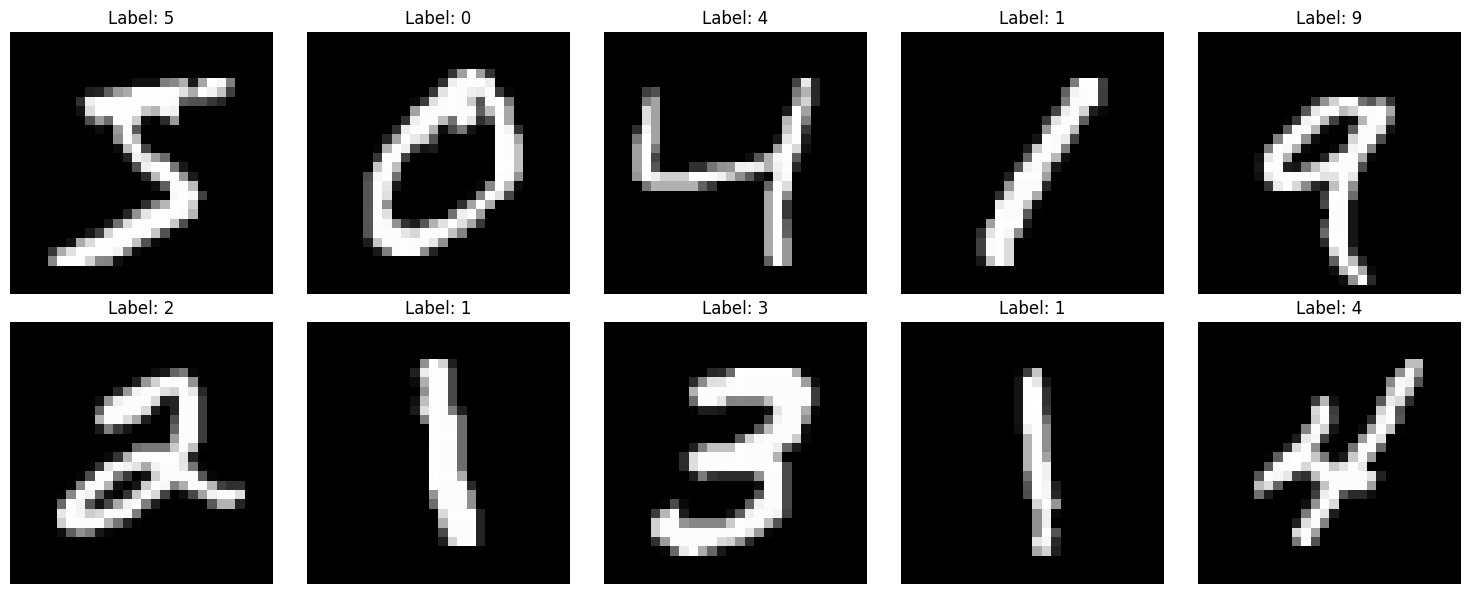

In [4]:

# Create a figure with subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows, 5 columns

# Display the first 10 images
for i in range(10):
    ax = axes[i // 5, i % 5]  # Determine the subplot position
    ax.imshow(X_train[i], cmap='gray')  # Display the image
    ax.set_title(f"Label: {y_train[i]}")  # Set the title
    ax.axis('off')  # Hide the axes

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

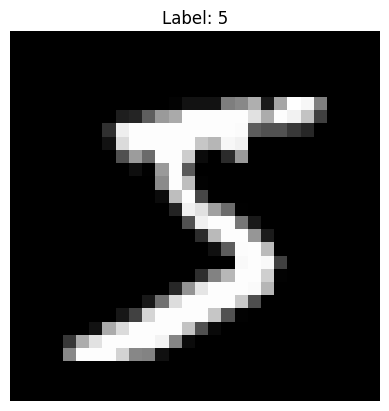

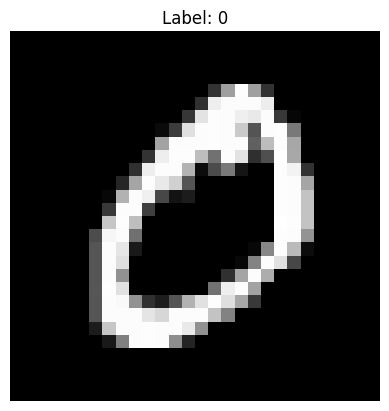

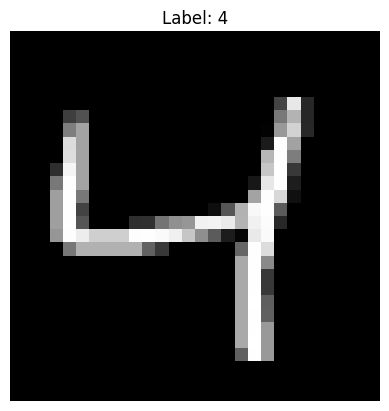

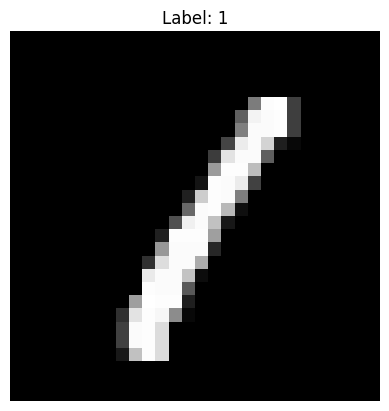

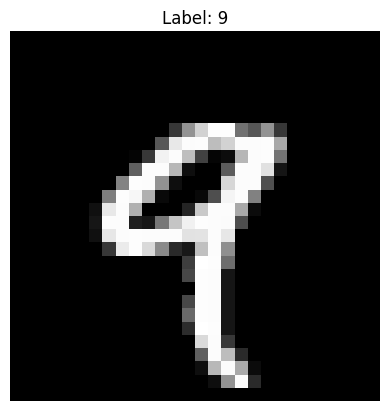

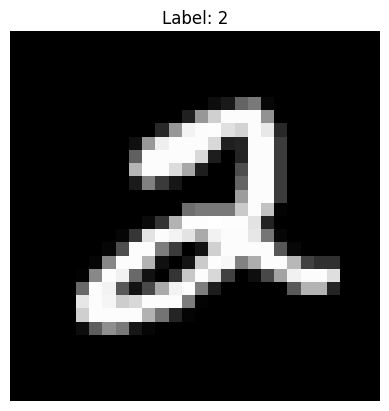

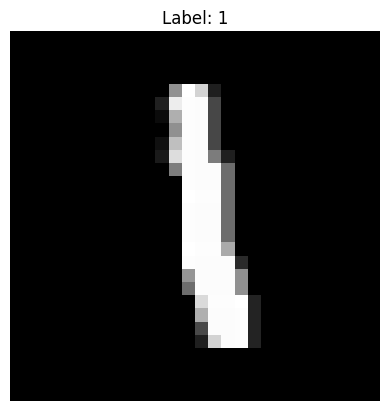

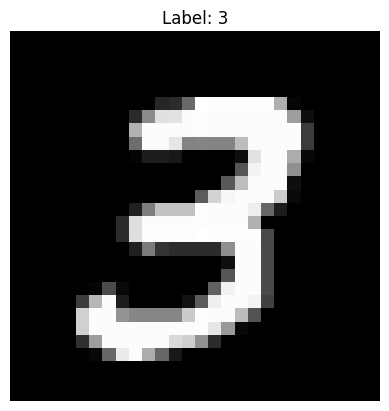

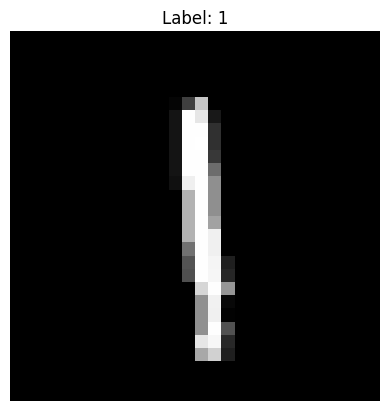

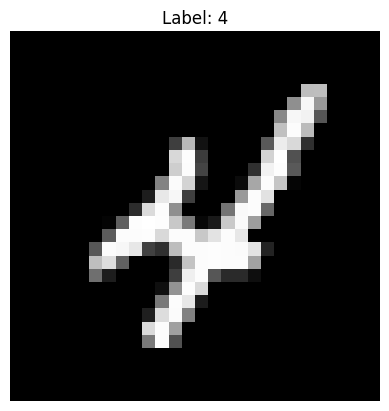

In [5]:
for i in range(10):
    plt.imshow(X_train[i, :, :, 0], cmap='gray')  # Note the indexing change
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
    plt.show()

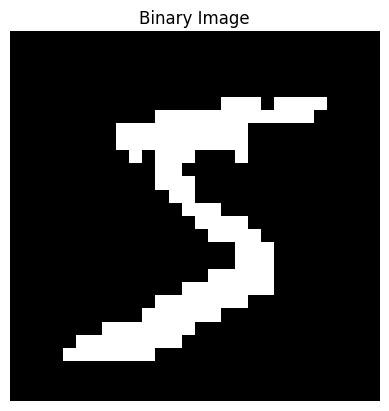

In [6]:
def to_binary(image):
    threshold = threshold_otsu(image)
    binary_image = (image > threshold).astype(int)
    return binary_image

# Example of converting the first image to binary
binary_image = to_binary(X_train[0, :, :, 0])  # Note the indexing change
plt.imshow(binary_image, cmap='gray')
plt.title("Binary Image")
plt.axis('off')
plt.show()

In [7]:
first_image_array = X_train[1]
# print("Array of the first image:")
print(first_image_array)

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [8]:
from skimage.color import rgb2gray, rgb2hsv
import numpy as np

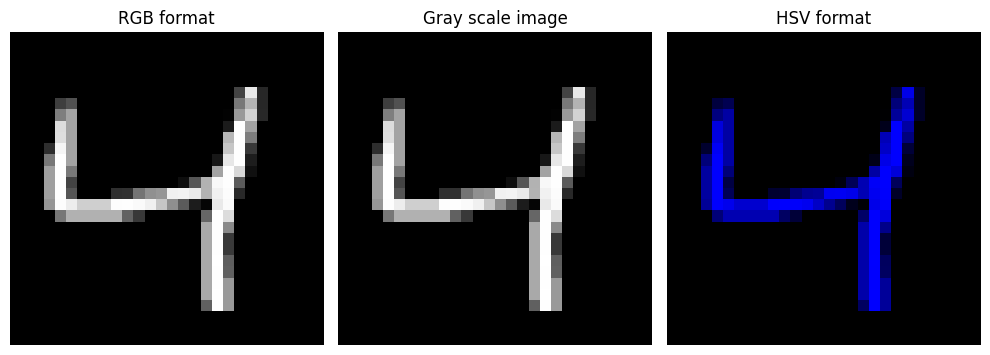

In [9]:
# Convert the first image from MNIST to RGB for demonstration
# Since MNIST images are grayscale, we can convert them to RGB by repeating the channel
from skimage.color import rgb2gray, rgb2hsv
import numpy as np
building_img = np.repeat(X_train[2, :, :, 0][:, :, np.newaxis], 3, axis=2)

# Convert images to grayscale and HSV format
build_gray = rgb2gray(building_img)  # This will still be the same as the original since it's already grayscale
build_hsv = rgb2hsv(building_img)

# Plot the RGB, Grayscale, and HSV images
plt.figure(figsize=(10, 8))
plt.subplot(1, 3, 1)
plt.imshow(building_img)
plt.title("RGB format")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(build_gray, cmap='gray')
plt.title("Gray scale image")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(build_hsv)
plt.title("HSV format")
plt.axis('off')

plt.tight_layout()
plt.show()

Shape of the resized image:  (400, 400, 3)


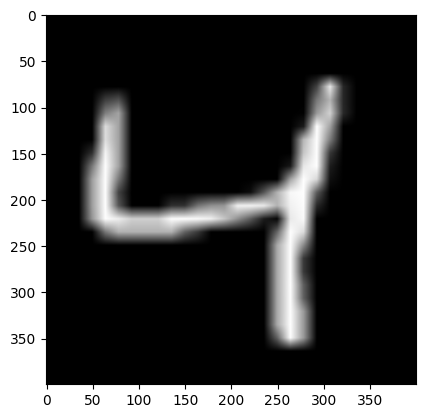

In [10]:
from skimage.transform import resize

def resize_image(image, new_shape):
    """
    Resize an image to the specified shape.

    Parameters:
    - image: np.ndarray
        The input image to be resized.
    - new_shape: tuple
        The desired output shape (height, width).

    Returns:
    - resized_image: np.ndarray
        The resized image.
    """
    resized_image = resize(image, new_shape)
    print("Shape of the resized image: ", resized_image.shape)
    plt.imshow(resized_image)
    plt.show()

# Example usage:
build_resize = resize_image(building_img, (400,400))

In [11]:
from skimage.transform import rescale, rotate
from skimage import exposure

Shape of rescaled image:  (17, 14, 1)


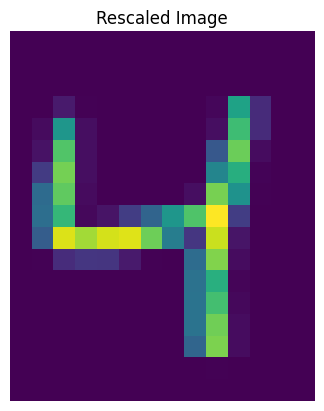

In [12]:
# Rescaling the image

build_rescale = rescale(building_img, scale=(0.6, 0.5, 1/3)) #adjust the dimensions
print("Shape of rescaled image: ", build_rescale.shape)
plt.imshow(build_rescale)
plt.title("Rescaled Image")
plt.axis('off')
plt.show()

Rotate image shape same as original:  (28, 28, 3)


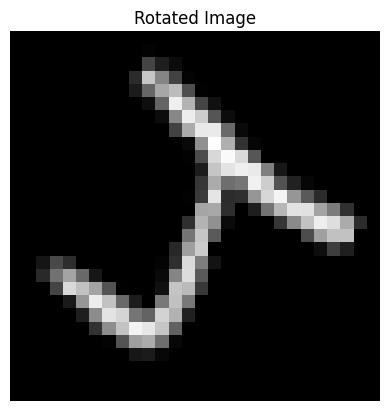

In [13]:
# Rotate the image
rotate_img = rotate(building_img, angle=60)
print("Rotate image shape same as original: ", rotate_img.shape)
plt.imshow(rotate_img)
plt.title("Rotated Image")
plt.axis('off')
plt.show()

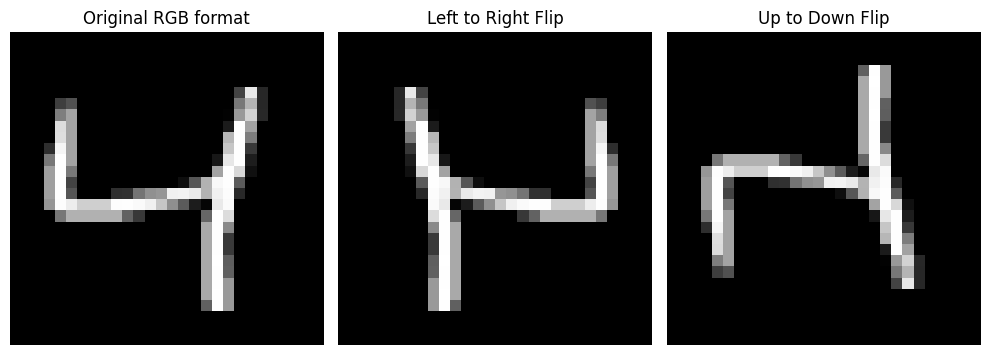

In [14]:
# Flipping the images
build_lr = np.fliplr(building_img)
build_ud = np.flipud(building_img)
plt.figure(figsize=(10, 8))
plt.subplot(1, 3, 1)
plt.imshow(building_img)
plt.title("Original RGB format")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(build_lr)
plt.title("Left to Right Flip")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(build_ud)
plt.title("Up to Down Flip")
plt.axis('off')

plt.tight_layout()
plt.show()

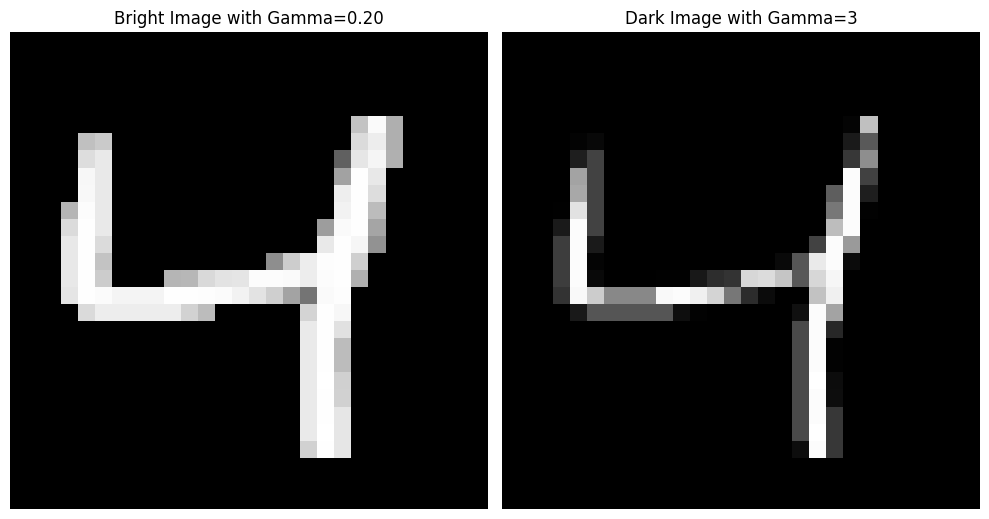

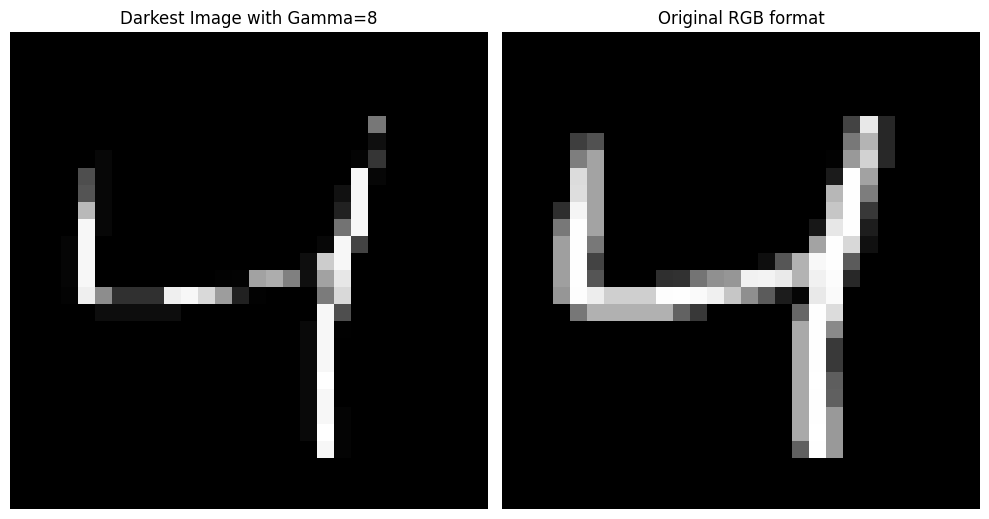

In [15]:
# Adjusting brightness
bright = exposure.adjust_gamma(building_img, gamma=0.20, gain=1)
dark = exposure.adjust_gamma(building_img, gamma=3, gain=1)
darkest = exposure.adjust_gamma(building_img, gamma=8, gain=1)

# Plot brightness adjusted images
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(bright)
plt.title("Bright Image with Gamma=0.20")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dark)
plt.title("Dark Image with Gamma=3")
plt.axis('off')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(darkest)
plt.title("Darkest Image with Gamma=8")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(building_img)
plt.title("Original RGB format")
plt.axis('off')

plt.tight_layout()
plt.show()